# PROBLEM STATEMNET
Management of lifestyle diseases in hospitalized patients has a significant bearing on 
outcome, in terms of both morbidity and mortality. The main object for this problem is to 
predict whether a patient is likely to be readmitted to hospital based on the previous details of 
the patient.

# Importing required packages

In [1]:

import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,recall_score,mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

#model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn_pandas import DataFrameMapper

In [2]:
train=pd.read_csv('Train.csv')#importing train data
test=pd.read_csv('test.csv')#importing test data

In [3]:
train.head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),?,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),?,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),?,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),?,5,?,63,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),?,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1


In [4]:
test.head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X18,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed
0,11128,46325466,3928383,Caucasian,Female,[70-80),?,3,?,45,...,No,No,No,No,No,No,No,No,No,Yes
1,79758,245219616,60926103,Caucasian,Male,[60-70),?,2,?,10,...,No,No,No,No,No,No,No,No,No,Yes
2,52497,155321232,25234848,AfricanAmerican,Male,[70-80),?,11,InternalMedicine,41,...,No,No,Steady,No,No,No,No,No,No,Yes
3,64504,179491944,86935374,Caucasian,Female,[70-80),?,1,InternalMedicine,71,...,No,No,No,No,No,No,No,No,No,No
4,987,7425954,2486826,AfricanAmerican,Female,[50-60),?,7,InternalMedicine,59,...,No,No,Steady,No,No,No,No,No,Ch,Yes


In [5]:
print('Train :',train.shape)
print('Test :',test.shape)

Train : (66587, 49)
Test : (16647, 48)


In [6]:
train.describe(include='all') #getting brief summary of data

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
count,66587.000000,6.658700e+04,6.658700e+04,66587,66587,66587,66587,66587.000000,66587,66587.000000,...,66587,66587,66587,66587,66587,66587,66587,66587,66587,66587.000000
unique,NaN,NaN,NaN,6,3,10,10,NaN,65,NaN,...,1,4,4,2,2,2,1,2,2,NaN
top,NaN,NaN,NaN,Caucasian,Female,[70-80),?,NaN,?,NaN,...,No,No,No,No,No,No,No,No,Yes,NaN
freq,NaN,NaN,NaN,49906,35973,17031,64454,NaN,32672,NaN,...,66587,31175,66110,66575,66586,66582,66587,35894,51205,NaN
mean,50903.474282,1.653153e+08,5.422970e+07,NaN,NaN,NaN,NaN,4.397510,NaN,43.115533,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.462012
std,29480.255515,1.030035e+08,3.878819e+07,NaN,NaN,NaN,NaN,2.980995,NaN,19.630417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498559
min,0.000000,1.573800e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,25166.500000,8.440328e+07,2.338646e+07,NaN,NaN,NaN,NaN,2.000000,NaN,31.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,51129.000000,1.528504e+08,4.526103e+07,NaN,NaN,NaN,NaN,4.000000,NaN,44.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,76380.000000,2.305049e+08,8.727185e+07,NaN,NaN,NaN,NaN,6.000000,NaN,57.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [7]:
train.info() #Basic information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66587 entries, 0 to 66586
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               66587 non-null  int64  
 1   encounter_id        66587 non-null  int64  
 2   patient_id          66587 non-null  int64  
 3   race                66587 non-null  object 
 4   gender              66587 non-null  object 
 5   age                 66587 non-null  object 
 6   weight              66587 non-null  object 
 7   time_in_hospital    66587 non-null  int64  
 8   medical_specialty   66587 non-null  object 
 9   num_lab_procedures  66587 non-null  int64  
 10  num_procedures      66587 non-null  int64  
 11  num_medications     66587 non-null  int64  
 12  number_outpatient   66587 non-null  int64  
 13  number_emergency    66587 non-null  int64  
 14  number_inpatient    66587 non-null  int64  
 15  diag_1              66587 non-null  object 
 16  diag

In [8]:
# To drop index column
for var in ['index']:
    train.drop(var,inplace=True,axis=1)
    test.drop(var,inplace=True,axis=1)

# Feature enginering

 Handeling Missing values

In [9]:
def Missing_Values(train):
    variable_name = []
    total_value = []
    total_missing_value = []
    missing_value_rate = []
    unique_value_list = []
    total_unique_value = []
    data_type = []
    
    for col in train.columns:
        variable_name.append(col)
        data_type.append(train[col].dtype)
        total_value.append(train[col].shape[0])
        total_missing_value.append(train[col].isnull().sum())
        missing_value_rate.append(round(train[col].isnull().sum()/train[col].shape[0],4))
        unique_value_list.append(train[col].unique())
        total_unique_value.append(len(train[col].unique()))
        
    missing_data=pd.DataFrame({"Variable":variable_name,\
                               "#_Total_Value":total_value,\
                               "#_Total_Missing_Value":total_missing_value,\
                               "%_Missing_Value_Rate":missing_value_rate,\
                               "Data_Type":data_type,"Unique_Value":unique_value_list,\
                               "Total_Unique_Value":total_unique_value
                              })
    
    missing_data = missing_data.set_index("Variable")
    return missing_data.sort_values("#_Total_Missing_Value",ascending=False)

In [10]:
data_info = Missing_Values(train)
data_info

,#_Total_Value,#_Total_Missing_Value,%_Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
Variable,,,,,,
encounter_id,66587,0,0.0,int64,"[197029140, 163571946, 256497366, 289891212, 8...",48911
patient_id,66587,0,0.0,int64,"[51521940, 92631357, 30023982, 93606021, 23464...",39650
X7,66587,0,0.0,object,"[No, Steady, Up, Down]",4
X8,66587,0,0.0,object,[No],1
X9,66587,0,0.0,object,"[No, Steady, Up, Down]",4
X10,66587,0,0.0,object,"[No, Down, Steady, Up]",4
X11,66587,0,0.0,object,"[No, Steady]",2
X12,66587,0,0.0,object,"[No, Steady, Down, Up]",4
X13,66587,0,0.0,object,"[Steady, No, Up, Down]",4


In [11]:
def Missing_Values_test(test):
    variable_name = []
    total_value = []
    total_missing_value = []
    missing_value_rate = []
    unique_value_list = []
    total_unique_value = []
    data_type = []
    
    for col in test.columns:
        variable_name.append(col)
        data_type.append(test[col].dtype)
        total_value.append(test[col].shape[0])
        total_missing_value.append(test[col].isnull().sum())
        missing_value_rate.append(round(test[col].isnull().sum()/test[col].shape[0],4))
        unique_value_list.append(test[col].unique())
        total_unique_value.append(len(test[col].unique()))
        
    missing_data=pd.DataFrame({"Variable":variable_name,\
                               "#_Total_Value":total_value,\
                               "#_Total_Missing_Value":total_missing_value,\
                               "%_Missing_Value_Rate":missing_value_rate,\
                               "Data_Type":data_type,"Unique_Value":unique_value_list,\
                               "Total_Unique_Value":total_unique_value
                              })
    
    missing_data = missing_data.set_index("Variable")
    return missing_data.sort_values("#_Total_Missing_Value",ascending=False)

In [12]:
data_info = Missing_Values_test(test)
data_info

,#_Total_Value,#_Total_Missing_Value,%_Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
Variable,,,,,,
encounter_id,16647,0,0.0,int64,"[46325466, 245219616, 155321232, 179491944, 74...",15379
X16,16647,0,0.0,object,[No],1
X7,16647,0,0.0,object,"[No, Down, Steady, Up]",4
X8,16647,0,0.0,object,[No],1
X9,16647,0,0.0,object,"[No, Steady, Up, Down]",4
X10,16647,0,0.0,object,"[Steady, No, Down, Up]",4
X11,16647,0,0.0,object,"[No, Steady]",2
X12,16647,0,0.0,object,"[No, Steady, Down, Up]",4
X13,16647,0,0.0,object,"[No, Steady, Up, Down]",4


In [13]:
# Replacing "?" with None
train = train.replace('?',value= None)
train['gender'] = train['gender'].replace('Unknown/Invalid',value=None)
test = test.replace('?',value= None)
test['gender'] = test['gender'].replace('Unknown/Invalid',value=None)

In [14]:
data_info = Missing_Values(train)
data_info

,#_Total_Value,#_Total_Missing_Value,%_Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
Variable,,,,,,
weight,66587,64454,0.9680,object,"[None, [0-25), [75-100), [50-75), [25-50), [12...",10
medical_specialty,66587,32672,0.4907,object,"[Emergency/Trauma, Nephrology, None, Psychiatr...",65
race,66587,1504,0.0226,object,"[Hispanic, Caucasian, AfricanAmerican, None, O...",6
diag_3,66587,954,0.0143,object,"[585, 569, 250, 300, 414, 998, 780, 458, 427, ...",707
diag_4,66587,954,0.0143,object,"[585, 569, 250, 300, 414, 998, 780, 458, 427, ...",707
diag_2,66587,231,0.0035,object,"[403, 788, 783, 276, 250.02, 411, 250, 427, 49...",656
diag_1,66587,15,0.0002,object,"[783, 564, 574, 401, 311, 410, 414, 552, 427, ...",652
gender,66587,2,0.0000,object,"[Male, Female, None]",3
X12,66587,0,0.0000,object,"[No, Steady, Down, Up]",4


In [15]:
data_info = Missing_Values_test(test)
data_info

,#_Total_Value,#_Total_Missing_Value,%_Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
Variable,,,,,,
weight,16647,16107,0.9676,object,"[None, [50-75), [125-150), [100-125), [75-100)...",9
medical_specialty,16647,8081,0.4854,object,"[None, InternalMedicine, Family/GeneralPractic...",59
race,16647,371,0.0223,object,"[Caucasian, AfricanAmerican, Asian, None, Hisp...",6
diag_3,16647,247,0.0148,object,"[410, 401, 599, 276, 250.6, 413, 250, 414, Non...",538
diag_4,16647,247,0.0148,object,"[410, 401, 599, 276, 250.6, 413, 250, 414, Non...",538
diag_2,16647,63,0.0038,object,"[414, 788, 996, 496, 591, 287, 428, 427, V18, ...",489
diag_1,16647,3,0.0002,object,"[786, 600, 584, 38, 593, 414, 996, 530, 250.22...",498
gender,16647,1,0.0001,object,"[Female, Male, None]",3
X16,16647,0,0.0000,object,[No],1


In [16]:
# Encounter id Copy for submission file
testRes = test[['encounter_id']]

 Columns that would not give information and which has more missing values were removed

In [17]:
# Droping weight, medical_specilaty because % of missing value is high in both train and test data
for var in ('encounter_id','patient_id','weight','medical_specialty'):
    train.drop(var,inplace=True,axis=1)
    test.drop(var,inplace=True,axis=1)

In [18]:
# Missing value treatment for Train and test dataset using 
na_features = [var for var in train.columns if train[var].isnull().sum()>0]
for var in na_features:
    train[var].fillna(train[var].mode()[0],inplace=True)
    test[var].fillna(test[var].mode()[0],inplace=True)

# Data Visualization

0    35823
1    30764
Name: readmitted, dtype: int64


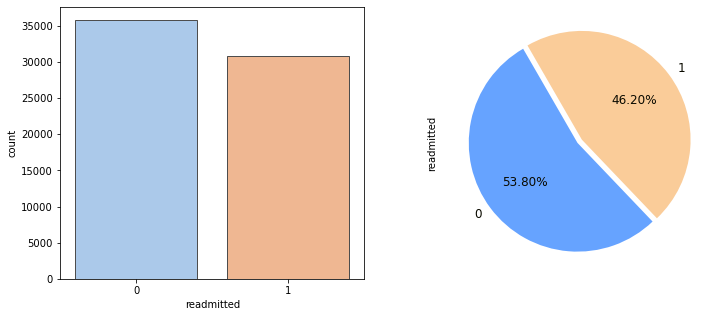

In [19]:
print(train['readmitted'].value_counts())
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(12,5))
labels=['0','1']
sns.countplot(x=train.readmitted, data=train, palette="pastel",ax=ax[0], edgecolor=".3")
train.readmitted.value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66a3ff','#facc99'], 
                                        labels=labels, explode = (0, 0.05), startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})
plt.show()

In a given data 46% 0f patient is likely to be readmitted to hospital

Female    35975
Male      30612
Name: gender, dtype: int64


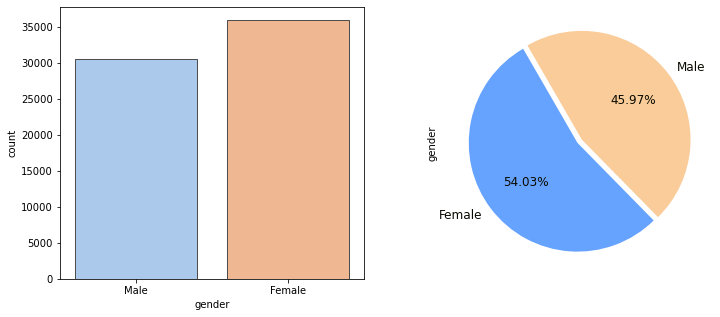

In [20]:
print(train.gender.value_counts())
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(12,5))
labels=['Female','Male']
sns.countplot(x=train.gender, data=train, palette="pastel",ax=ax[0], edgecolor=".3")
train.gender.value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66a3ff','#facc99'], 
                                        labels=labels, explode = (0, 0.05), startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})
plt.show()

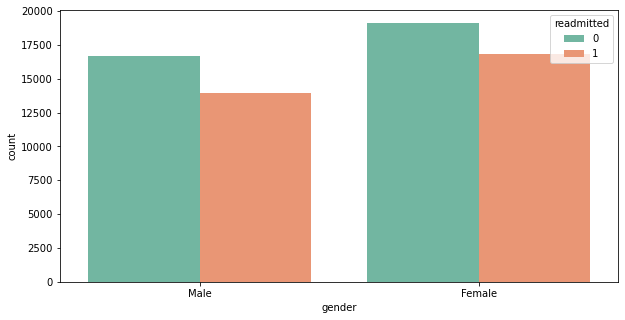

In [21]:
f, ax = plt.subplots(figsize=(10, 5))
plot = sns.countplot(x='gender', data=train, palette='Set2', hue='readmitted')
plot.set_xticklabels(plot.get_xticklabels()) 
plt.show()

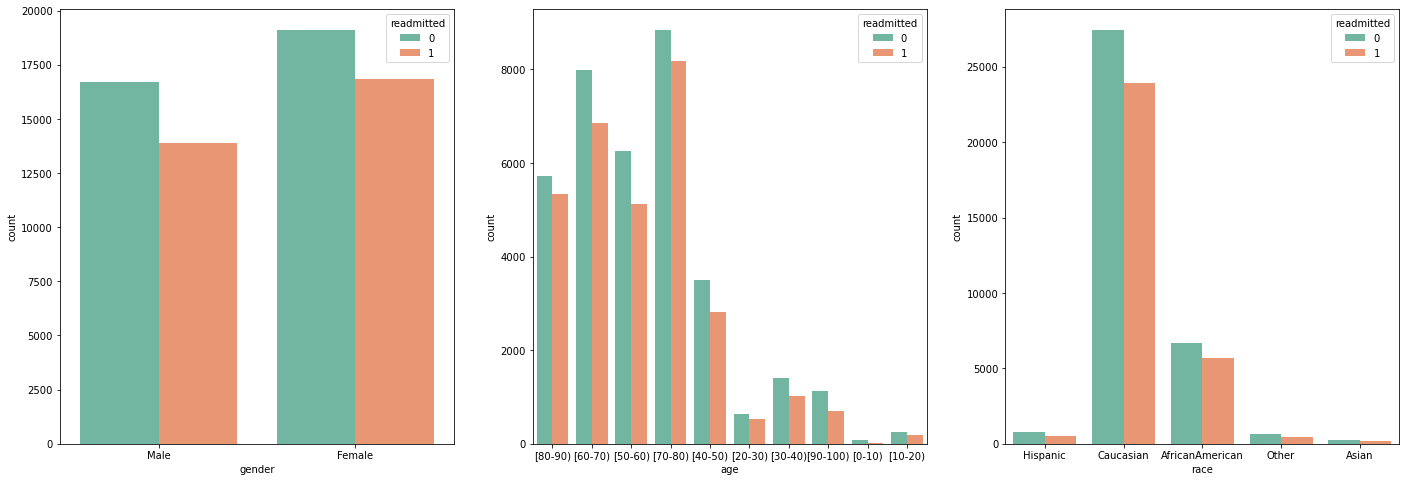

In [22]:
visual_list = ['gender','age','race']
fig, ax =plt.subplots(nrows=1,ncols=3,figsize=(24,8))
count =0
for i in visual_list:
    sns.countplot(train[i], hue=train.readmitted, palette='Set2', ax=ax[count]);
    count = count+1

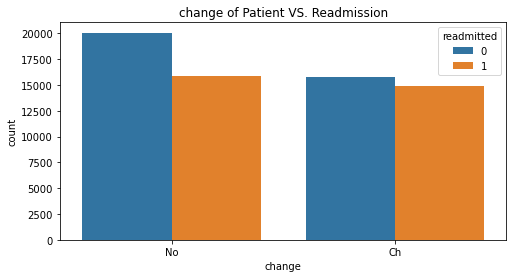

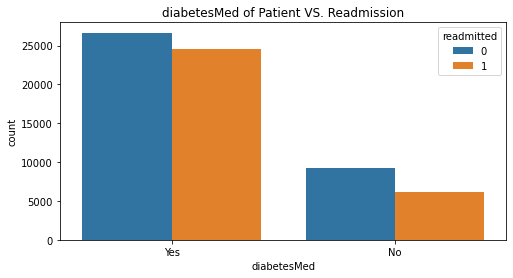

In [23]:
# analyze categorical Columns:
for var in ('change','diabetesMed'):
    fig = plt.figure(figsize=(8,4))
    sns.countplot(x= train[var], hue = train['readmitted']).set_title(f'{var} of Patient VS. Readmission')

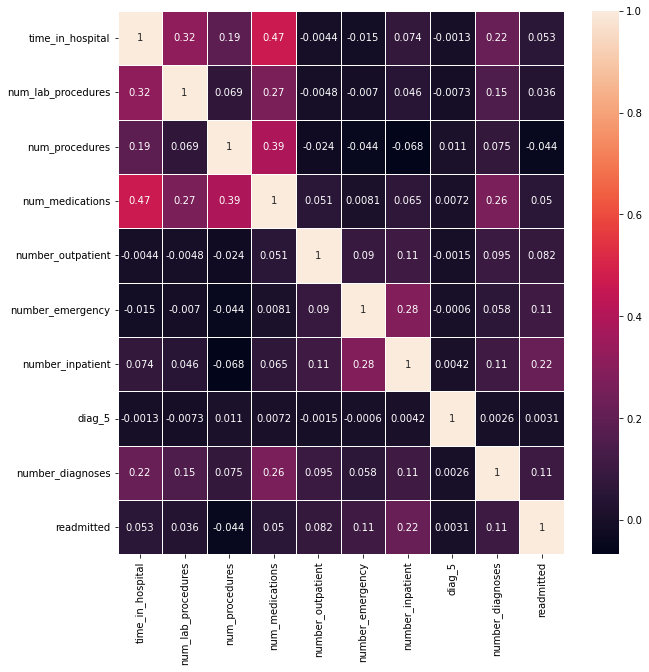

In [24]:
plt.figure(figsize = (10, 10))

corr = train.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

# converting object variables to categorical variables

In [25]:
cat_attr = train.select_dtypes('object').columns
cat_attr

Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'diag_4', 'X1',
       'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12',
       'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22',
       'X23', 'X24', 'X25', 'change', 'diabetesMed'],
      dtype='object')

In [26]:
train[cat_attr]= train[cat_attr].astype('category')

In [27]:
cat_attr_t=test.select_dtypes(include ='object').columns 
cat_attr_t


Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'diag_4', 'X1',
       'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12',
       'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22',
       'X23', 'X24', 'X25', 'change', 'diabetesMed'],
      dtype='object')

In [28]:
test[cat_attr] = test[cat_attr].astype('category')

In [29]:
num_attr = train.columns.difference(cat_attr)
num_attr_t = test.columns.difference(cat_attr)


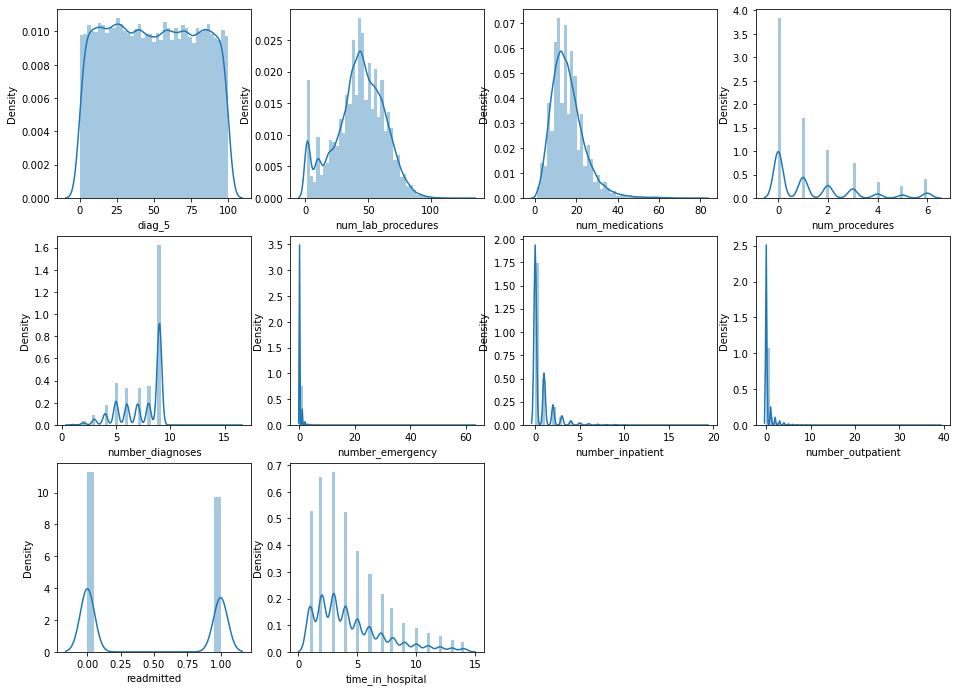

In [30]:
plt.figure(figsize=(16,16))
for y in range (0,len(num_attr)):
    plt.subplot(4,4,y+1)
    var = num_attr[y]
    sns.distplot(train[var])

In [31]:
# dropping 'diag_5' variable due to equal distribution (based on dist plot)
train.drop(labels = ['diag_5'], axis = 1,inplace = True)
test.drop(labels = ['diag_5'], axis = 1,inplace = True)

In [32]:
# converting 'number_diagnoses' variable to categorical with condition 'number_diagnoses' > 3 indicates 1 else 0 (based on the distribution curve) 
train['number_diagnoses'] = train['number_diagnoses'].apply(lambda x: 1 if x >3 else 0)
test['number_diagnoses'] = test['number_diagnoses'].apply(lambda x: 1 if x >3 else 0)

In [33]:
num_attr = train.columns.difference(cat_attr)
num_attr_t = test.columns.difference(cat_attr)

In [34]:
num_attr_t


Index(['num_lab_procedures', 'num_medications', 'num_procedures',
       'number_diagnoses', 'number_emergency', 'number_inpatient',
       'number_outpatient', 'time_in_hospital'],
      dtype='object')

# Handeling categorical feature

In [35]:
column =['gender','diabetesMed','change']

for col in column:
    train[col] = pd.get_dummies(train[col],drop_first=1)
    test[col] = pd.get_dummies(test[col],drop_first=1)

In [36]:
# label_encoder object
label_encoder= LabelEncoder()

# Encode labels in column 'species'.
for df in train,test:
    df['age']= label_encoder.fit_transform(df['age'])


In [37]:
for df in train,test:
    df['race'] = df['race'].astype('category').cat.codes
    df['diag_1'] = df['diag_1'].astype('category').cat.codes
    df['diag_2'] = df['diag_2'].astype('category').cat.codes
    df['diag_3'] = df['diag_3'].astype('category').cat.codes
    df['diag_4'] = df['diag_4'].astype('category').cat.codes


In [38]:
medications=['X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23','X24','X25']

for col in medications:
    train[col] = train[col].replace(['No','Steady','Up','Down'],[0,1,1,1])
    train[col] = train[col].astype(int)
    test[col] = test[col].replace(['No','Steady','Up','Down'],[0,1,1,1])
    test[col] = test[col].astype(int)

In [39]:
medication=['X1','X2']

for col in medication:
    train[col] = train[col].replace(['>7','>8','Norm','None'],[2,2,1,0])
    train[col] = train[col].replace(['>200','>300','Norm','None'],[2,2,1,0])
    test[col] = test[col].replace(['>7','>8','Norm','None'],[2,2,1,0])
    test[col] = test[col].replace(['>200','>300','Norm','None'],[2,2,1,0])

In [40]:
data_info = Missing_Values(train)
data_info

,#_Total_Value,#_Total_Missing_Value,%_Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
Variable,,,,,,
race,66587,0,0.0,int8,"[3, 2, 0, 4, 1]",5
X18,66587,0,0.0,int32,[0],1
X10,66587,0,0.0,int32,"[0, 1]",2
X11,66587,0,0.0,int32,"[0, 1]",2
X12,66587,0,0.0,int32,"[0, 1]",2
X13,66587,0,0.0,int32,"[1, 0]",2
X14,66587,0,0.0,int32,"[0, 1]",2
X15,66587,0,0.0,int32,"[0, 1]",2
X16,66587,0,0.0,int32,"[0, 1]",2


In [41]:
train['X1']=train['X1'].astype(int)
train['X2']=train['X2'].astype(int)

In [42]:
test['X1']=test['X1'].astype(int)
test['X2']=test['X2'].astype(int)

In [43]:
df.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,X18,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed
0,2,0,7,3,45,3,10,0,0,1,...,0,0,0,0,0,0,0,0,1,1
1,2,1,6,2,10,1,16,1,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,1,7,11,41,1,15,0,0,1,...,0,0,1,0,0,0,0,0,1,1
3,2,0,7,1,71,2,11,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,5,7,59,2,18,0,0,0,...,0,0,1,0,0,0,0,0,0,1


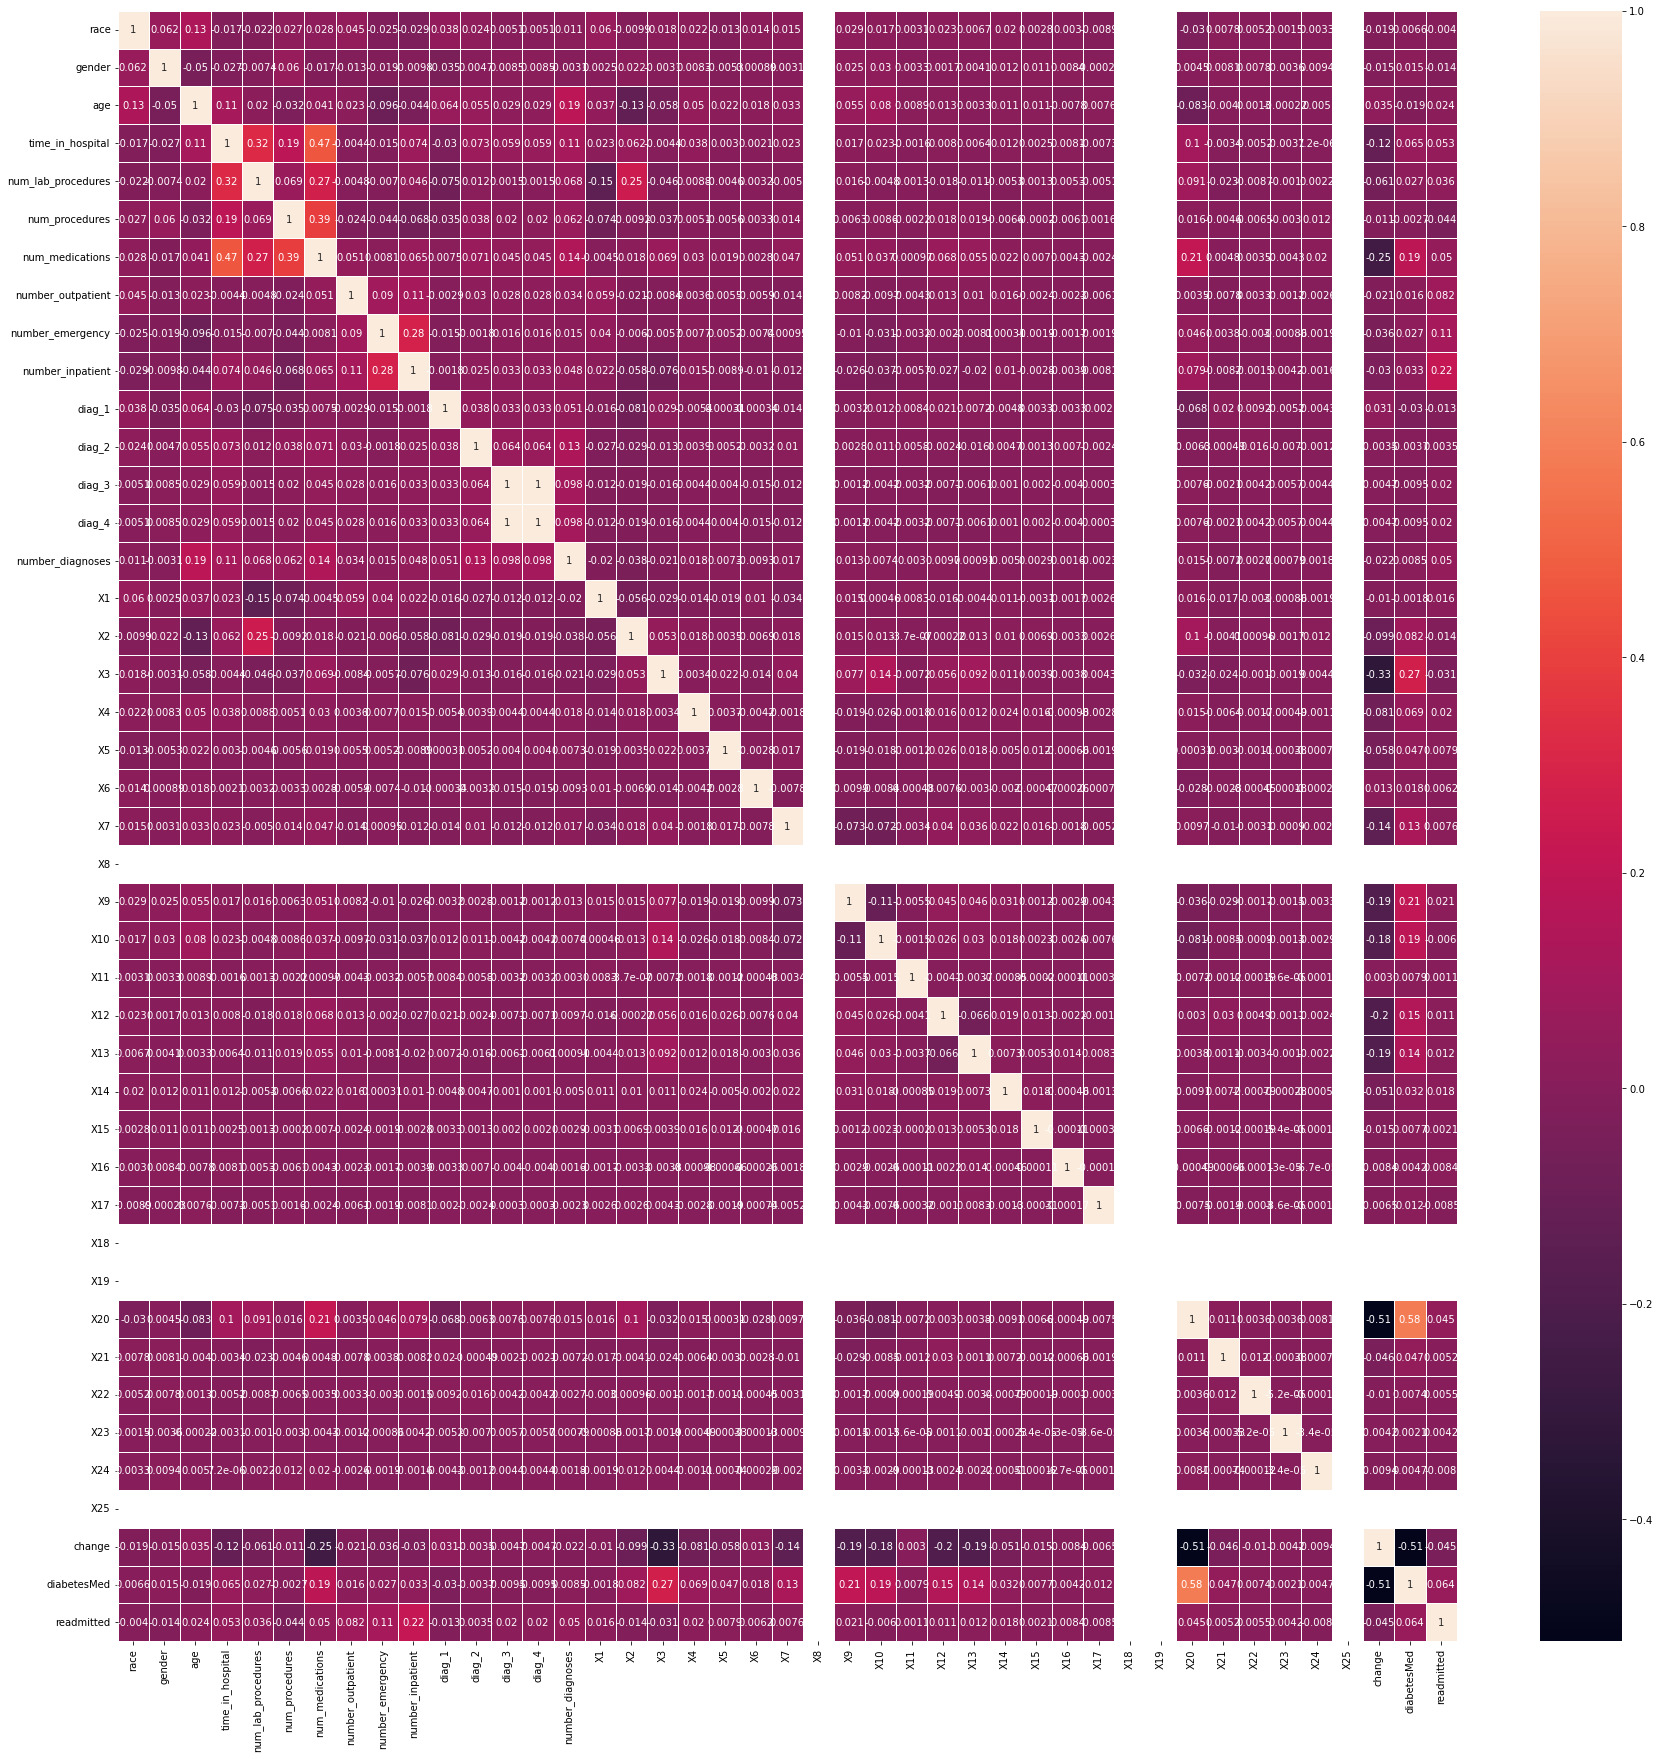

In [44]:
plt.figure(figsize = (30, 30))

corr = train.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [45]:
# From heatmap we can conclude that diag_3_grouped & diag_4_grouped are highly co related so we can drop one column
for df in train,test:
    df.drop('diag_4', axis = 1, inplace = True)

In [46]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
na_features = ['num_lab_procedures', 'num_medications', 'num_procedures',
       'number_diagnoses', 'number_emergency', 'number_inpatient',
       'number_outpatient', 'time_in_hospital']
for var in na_features:
    train[var] = scaler.fit_transform(train[var].values.reshape(-1, 1))
    test[var] = scaler.transform(test[var].values.reshape(-1, 1))

# ML Model Building

In [47]:
def get_CR_CM(train_actual,train_predicted,test_actual,test_predicted):
    print('''
         ========================================
           CLASSIFICATION REPORT FOR TRAIN DATA
         ========================================
        ''')
    print(classification_report(train_actual, train_predicted, digits=4))

    print('''
             =============================================
               CLASSIFICATION REPORT FOR VALIDATION DATA
             =============================================
            ''')
    print(classification_report(test_actual, test_predicted, digits=4))
    print('''
             ========================================
               Confusion Matrix FOR TRAIN DATA
             ========================================
            ''')
    print(confusion_matrix(train_actual, train_predicted))

    print('''
             =============================================
               Confusion matrix FOR VALIDATION DATA
             =============================================
            ''')
    print(confusion_matrix(test_actual, test_predicted))

In [48]:
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    get_CR_CM(train_actual,train_predicted,test_actual,test_predicted)
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted)
    train_precision= precision_score(train_actual,train_predicted)
    train_f1score  = f1_score(train_actual,train_predicted)
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted)
    test_precision= precision_score(test_actual,test_predicted)
    test_f1score  = f1_score(test_actual,test_predicted)
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

In [49]:
# Train test Split
from sklearn.model_selection import train_test_split

y = train[['readmitted']]
X = train.drop(['readmitted'], axis=1)
X_test = test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=123, shuffle=True)

# Logistic Regression

In [50]:
# logistic regression object
log_mod = LogisticRegression(class_weight='balanced', random_state=123)
log_mod.fit(X_train, y_train)

y_pred_train = log_mod.predict(X_train)
y_pred_val = log_mod.predict(X_val)

In [51]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"LogisticRegression",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.6223    0.7323    0.6728     28653
           1     0.6077    0.4827    0.5381     24616

    accuracy                         0.6170     53269
   macro avg     0.6150    0.6075    0.6055     53269
weighted avg     0.6156    0.6170    0.6106     53269


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.6165    0.7276    0.6675      7170
           1     0.5978    0.4722    0.5276      6148

    accuracy                         0.6097     13318
   macro avg     0.6072    0.5999    0.5976     13318
weighted avg     0.6079    0.6097    0.6029     13318


               Confusion Matrix FOR TRAIN DATA
            
[[20982  7671]
 [12733 11883]]

               Confusion matrix FOR VALIDATION DATA
            
[[5217 1953]
 [3245 2903]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.616963,0.482735,0.607702,0.538058,0.609701,0.472186,0.597817,0.527626


# Decision Tree Classifier

In [52]:
clf_dt = DecisionTreeClassifier(random_state=123)
clf_dt.fit(X_train,y_train)

y_pred_train = clf_dt.predict(X_train)
y_pred_val = clf_dt.predict(X_val)

In [53]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"DecisionTree",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     28653
           1     1.0000    1.0000    1.0000     24616

    accuracy                         1.0000     53269
   macro avg     1.0000    1.0000    1.0000     53269
weighted avg     1.0000    1.0000    1.0000     53269


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.7553    0.7524    0.7539      7170
           1     0.7126    0.7157    0.7141      6148

    accuracy                         0.7355     13318
   macro avg     0.7339    0.7341    0.7340     13318
weighted avg     0.7356    0.7355    0.7355     13318


               Confusion Matrix FOR TRAIN DATA
            
[[28653     0]
 [    0 24616]]

               Confusion matrix FOR VALIDATION DATA
            
[[5395 1775]
 [1748 4400]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.616963,0.482735,0.607702,0.538058,0.609701,0.472186,0.597817,0.527626
1,DecisionTree,1.0,1.0,1.0,1.0,0.735471,0.71568,0.712551,0.714112


# Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=11,max_depth=25,n_estimators=50) 
forest_model.fit(X_train,y_train)
y_pred_train = forest_model.predict(X_train)
y_pred_val = forest_model.predict(X_val)

In [56]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"RandomForest",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.9917    0.9983    0.9950     28653
           1     0.9980    0.9903    0.9941     24616

    accuracy                         0.9946     53269
   macro avg     0.9949    0.9943    0.9946     53269
weighted avg     0.9946    0.9946    0.9946     53269


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.7614    0.8268    0.7927      7170
           1     0.7755    0.6978    0.7346      6148

    accuracy                         0.7672     13318
   macro avg     0.7684    0.7623    0.7637     13318
weighted avg     0.7679    0.7672    0.7659     13318


               Confusion Matrix FOR TRAIN DATA
            
[[28605    48]
 [  239 24377]]

               Confusion matrix FOR VALIDATION DATA
            
[[5928 1242]
 [1858 4290]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.616963,0.482735,0.607702,0.538058,0.609701,0.472186,0.597817,0.527626
1,DecisionTree,1.0,1.0,1.0,1.0,0.735471,0.71568,0.712551,0.714112
2,RandomForest,0.994612,0.990291,0.998035,0.994148,0.767232,0.697788,0.775488,0.734589


# XGBoost Classifier

In [57]:
from xgboost import XGBClassifier
clf_XGB = XGBClassifier(n_estimators=100, gamma=0.2,learning_rate=0.1,n_jobs=-1)
clf_XGB.fit(X_train,y_train)

y_pred_train = clf_XGB.predict(X_train)
y_pred_val = clf_XGB.predict(X_val)

In [58]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"XGBoost",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.6731    0.7983    0.7304     28653
           1     0.7003    0.5486    0.6153     24616

    accuracy                         0.6829     53269
   macro avg     0.6867    0.6735    0.6728     53269
weighted avg     0.6857    0.6829    0.6772     53269


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.6410    0.7669    0.6983      7170
           1     0.6474    0.4990    0.5636      6148

    accuracy                         0.6433     13318
   macro avg     0.6442    0.6330    0.6310     13318
weighted avg     0.6439    0.6433    0.6361     13318


               Confusion Matrix FOR TRAIN DATA
            
[[22874  5779]
 [11111 13505]]

               Confusion matrix FOR VALIDATION DATA
            
[[5499 1671]
 [3080 3068]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.616963,0.482735,0.607702,0.538058,0.609701,0.472186,0.597817,0.527626
1,DecisionTree,1.0,1.0,1.0,1.0,0.735471,0.71568,0.712551,0.714112
2,RandomForest,0.994612,0.990291,0.998035,0.994148,0.767232,0.697788,0.775488,0.734589
3,XGBoost,0.68293,0.548627,0.700322,0.615262,0.643265,0.499024,0.647394,0.563608


In [59]:
# Test dataset predictions
y_pred_test =forest_model.predict(X_test)

In [60]:
#testRes['readmitted'] = y_pred_test
#submission = testRes[['encounter_id','readmitted']]

In [61]:
# To Save submission file
#submission.columns = ['encounter_id','readmitted']
#submission.to_csv('submission.csv', index = False)